# This notebook presents several ideas of a technical approach to conducting stock price analysis.

## Imports and setup
FYI: I find 'Yahoo Finance' (yfinance) a bit better than pandas-datareader.

In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')

In [32]:
start = datetime(2019, 1, 1)
end = datetime.today()

Let's select a few NYSE tickers in the form of a dictionary, which will be loaded into yfinance. In this notebook I'm going to focus on banks. It is a completely subjective and random choice.

In [33]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
df = yf.download(tickers, start, end, group_by='ticker')
df.tail()

[*********************100%%**********************]  6 of 6 completed


Ticker             JPM                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2024-05-06  191.729996  192.199997  189.820007  192.000000  192.000000   
2024-05-07  191.699997  192.929993  191.649994  191.750000  191.750000   
2024-05-08  191.000000  196.649994  191.000000  195.649994  195.649994   
2024-05-09  195.169998  197.589996  195.100006  197.500000  197.500000   
2024-05-10  198.539993  199.339996  198.270004  198.770004  198.770004   

Ticker                      MS                                   ...  \
Price        Volume       Open       High        Low      Close  ...   
Date                                                             ...   
2024-05-06  7911100  94.559998  94.910004  93.699997  94.790001  ...   
2024-05-07  7688800  94.919998  95.930000  94.709999  95.790001  ...   
2024-05-08  9227600  95.430000  96.050003  95.099998  95.639999  ...   
2024-05-09  7977300  95.589996  98.260002  95.589996  98.110001  ...   
2024-05-10  7528800  98.739998  98.989998  97.629997  98.279999  ...   

Ticker              C                                        WFC             \
Price             Low      Close  Adj Close    Volume       Open       High   
Date                                                                          
2024-05-06  61.720001  62.810001  62.810001  13386700  60.470001  60.880001   
2024-05-07  61.970001  62.000000  62.000000  10158200  60.279999  60.610001   
2024-05-08  61.509998  62.750000  62.750000   9755200  60.150002  61.430000   
2024-05-09  62.290001  63.320000  63.320000  11563000  60.740002  61.369999   
2024-05-10  63.119999  63.529999  63.529999   9547000  61.459999  61.970001   

Ticker                                                 
Price             Low      Close  Adj Close    Volume  
Date                                                   
2024-05-06  59.840000  60.189999  60.189999  16240100  
2024-05-07  60.060001  60.259998  60.259998  16268200  
2024-05-08  60.099998  61.230000  61.230000  18718400  
2024-05-09  60.480000  61.279999  61.279999  14224300  
2024-05-10  61.459999  61.889999  61.889999  14423600  

[5 rows x 36 columns]

In [34]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1349 entries, 2019-01-02 to 2024-05-10
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (JPM, Open)       1349 non-null   float64
 1   (JPM, High)       1349 non-null   float64
 2   (JPM, Low)        1349 non-null   float64
 3   (JPM, Close)      1349 non-null   float64
 4   (JPM, Adj Close)  1349 non-null   float64
 5   (JPM, Volume)     1349 non-null   int64  
 6   (MS, Open)        1349 non-null   float64
 7   (MS, High)        1349 non-null   float64
 8   (MS, Low)         1349 non-null   float64
 9   (MS, Close)       1349 non-null   float64
 10  (MS, Adj Close)   1349 non-null   float64
 11  (MS, Volume)      1349 non-null   int64  
 12  (GS, Open)        1349 non-null   float64
 13  (GS, High)        1349 non-null   float64
 14  (GS, Low)         1349 non-null   float64
 15  (GS, Close)       1349 non-null   float64
 16  (GS, Adj Close)   1349 n

# Explanatory data analysis

### Dataframe prep.
Let's remove unwanted columns and check the maximum historical price of the selected stocks.

In [35]:
df.xs(key='Close', axis='columns', level='Price').max()

Ticker
JPM    200.300003
MS     108.730003
GS     455.559998
BAC     49.380001
C       81.910004
WFC     61.889999
dtype: float64

Dataframe based on close price.

In [36]:
dfClose = df.xs(key='Close', axis='columns', level='Price')

Let's check the stock price charts on a quick overview chart.

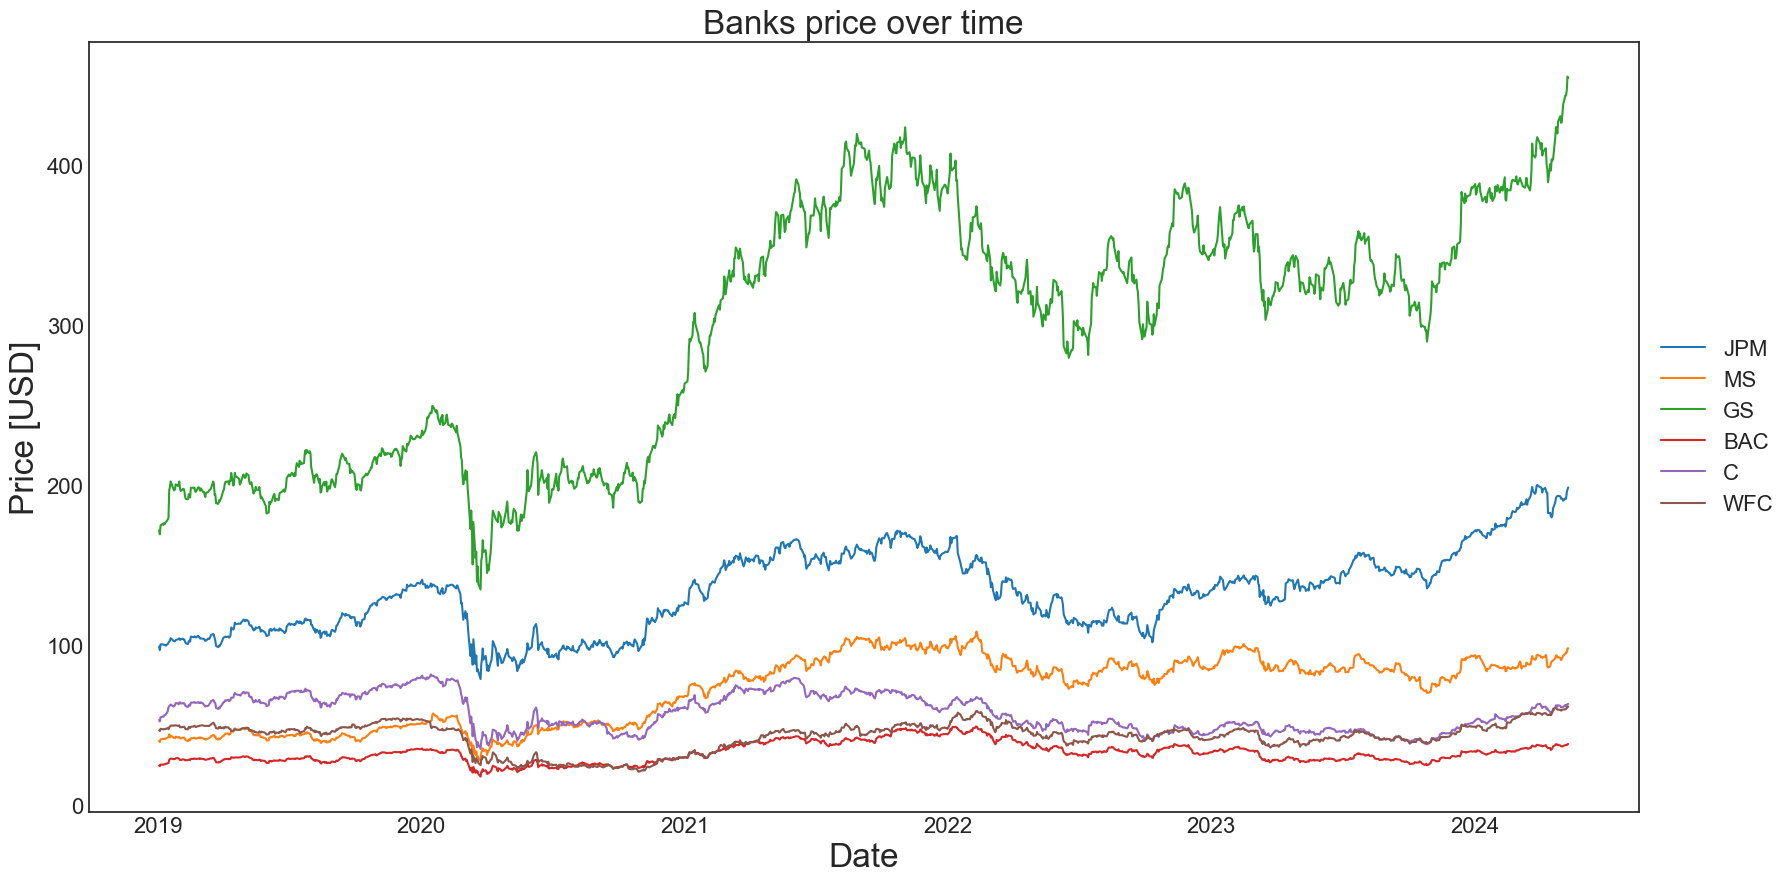

In [37]:
fig, axes = plt.subplots(figsize=(20,10))
axes.plot(dfClose)
axes.set_xlabel('Date', fontsize=24)
axes.set_ylabel('Price [USD]', fontsize=24)
axes.set_title('Banks price over time', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(labels=dfClose.columns, loc='center right', bbox_to_anchor=(1.1, 0.5), fontsize=16)

plt.show()

### Returns dataframe
To design a new dataframe containing return data, let's change the column names for convenience using a simple dictionary.

In [38]:
dfReturns = df.xs(key='Close', axis='columns', level='Price').pct_change()

dfReturnsColNames = {
    'GS': 'GS Return',
    'WFC': 'WFC Return',
    'MS': 'MS Return',
    'C': 'C Return',
    'BAC': 'BAC Return',
    'JPM': 'JPM Return'
}

dfReturns.rename(columns=dfReturnsColNames, inplace=True)

It's obvious that the first return value cannot be calculated, so for aesthetic purposes, let's assign the value = 0.

In [39]:
dfReturns.fillna(0, inplace=True)
dfReturns.iloc[:2]

Ticker,JPM Return,MS Return,GS Return,BAC Return,C Return,WFC Return
Date,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.022153,-0.017822,-0.014649,-0.016026,-0.018121,-0.007882


Let's check, when was the biggest dropdown. Nothing special :).

In [40]:
dfReturns.idxmin()

Ticker
JPM Return   2020-03-16
MS Return    2020-03-16
GS Return    2020-03-16
BAC Return   2020-03-16
C Return     2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

If we were to consider adding these stocks to our portfolio, then according to the Modern Portfolio Theory by Markowitz, it would be necessary to adjust the amount of stocks in the portfolio due to volatility – in this case, the appropriate measure is the standard deviation. To make a long story short, we should proportionally add fewer of the stocks with the highest standard deviation to the portfolio than those with lower volatility.

In [41]:
dfClose.std()

Ticker
JPM    25.438439
MS     21.470878
GS     76.794177
BAC     6.346141
C      11.289092
WFC     8.848163
dtype: float64

Regardless of local price volatility, the daily dispersion of returns is similar for all positions.

In [42]:
tickerStdDev = dfReturns.std()
tickerStdDev

Ticker
JPM Return    0.019653
MS Return     0.021793
GS Return     0.020210
BAC Return    0.022042
C Return      0.023976
WFC Return    0.023374
dtype: float64

### Having calculated the daily returns, it would be worth considering calculating the VaR - Value at Risk.

**Value at Risk (VaR)** is a statistical measure used to assess the level of risk associated with a portfolio or an investment over a specific time period. It provides an estimate of the potential loss in value of a risky asset or portfolio over a defined period for a given confidence interval. Essentially, VaR answers the question: "What is my potential loss over a certain period at a given confidence level?"

Key Characteristics of VaR:

- **Probability Level**: VaR is calculated for a specific confidence level, typically 95% or 99%.
- **Time Horizon**: The period over which the risk assessment is made, such as one day, one week, or one year.
- **Loss Estimation**: VaR gives a threshold value such that the loss on the portfolio over the given time horizon exceeds this threshold only with a specified probability.

Value at Risk is a widely used risk management tool in finance, but it is crucial to understand its limitations and ensure it is used appropriately within a broader risk management strategy.


In [43]:
from scipy.stats import norm

Text(0, 0.5, 'Count')

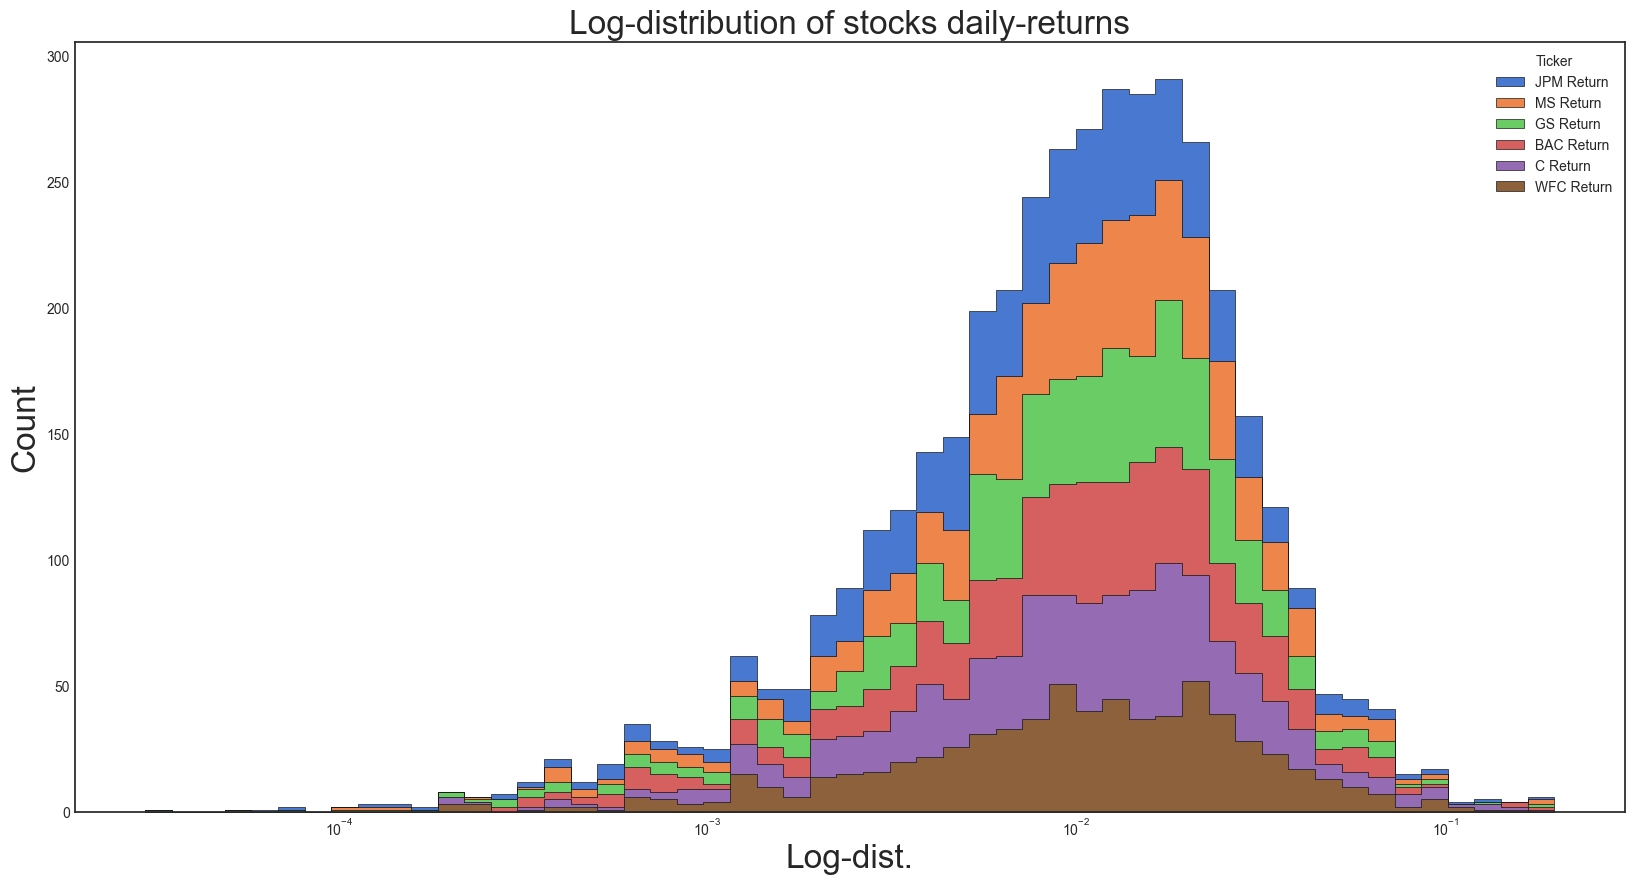

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(
    dfReturns,
    kde=False,
    alpha=1,
    multiple="stack",
    palette="muted",
    edgecolor=".1",
    linewidth=0.5,
    log_scale=True,
    element="step",
)
plt.title('Log-distribution of stocks daily-returns', fontsize='24')
plt.xlabel('Log-dist.', fontsize='24')
plt.ylabel('Count', fontsize='24')

$$ VaR_{\text{n days}} = VaR_{95} \times \sqrt{\text{n days}} $$

We can calculate VaR in a very simple way using the `norm.ppf` function from the scipy package. To change the time horizon, we multiply by the square root of the number of days in the period of interest. It's almost certain that for shorter periods, the VaR will be more radical.

In [45]:
confidence_level = 0.95

var_results = {}
var_results_30d = {}

for column in dfReturns.columns:
    returns = dfReturns[column]
    var = norm.ppf(1 - confidence_level, returns.mean(), returns.std())
    var_results[column] = round(var * 100, 2)
    var_results_30d[column] = round(var * 100 * np.sqrt(30), 2)

print('Based on the historical returns (2019/01/01 - today) of the portfolio at a 95% confidence interval, the worst loss is a 3.90% loss,\
     \ntherefore the result is negative.')
print(f"VaR historical: {var_results}")
print(f"VaR of 30 days: {var_results_30d}")
    

Based on the historical returns (2019/01/01 - today) of the portfolio at a 95% confidence interval, the worst loss is a 3.90% loss,     
therefore the result is negative.
VaR historical: {'JPM Return': -3.16, 'MS Return': -3.5, 'GS Return': -3.23, 'BAC Return': -3.57, 'C Return': -3.9, 'WFC Return': -3.8}
VaR of 30 days: {'JPM Return': -17.32, 'MS Return': -19.14, 'GS Return': -17.7, 'BAC Return': -19.55, 'C Return': -21.37, 'WFC Return': -20.8}


Let's examine the correlation between individual stocks. It is obvious that within the same sector, stocks must be correlated, but is it evenly so?

For example, a correlation of 0.50 means that 50% of the time, the movement of the stock prices for the compared companies is the same.

In [46]:
corrMatrix = dfClose.corr().round(2)
corrMatrix

Ticker,JPM,MS,GS,BAC,C,WFC
Ticker,,,,,,
JPM,1.00,0.78,0.87,0.70,0.27,0.60
MS,0.78,1.00,0.97,0.74,-0.07,0.38
GS,0.87,0.97,1.00,0.75,0.01,0.48
BAC,0.70,0.74,0.75,1.00,0.50,0.63
C,0.27,-0.07,0.01,0.50,1.00,0.49
WFC,0.60,0.38,0.48,0.63,0.49,1.00


A graphical approach.

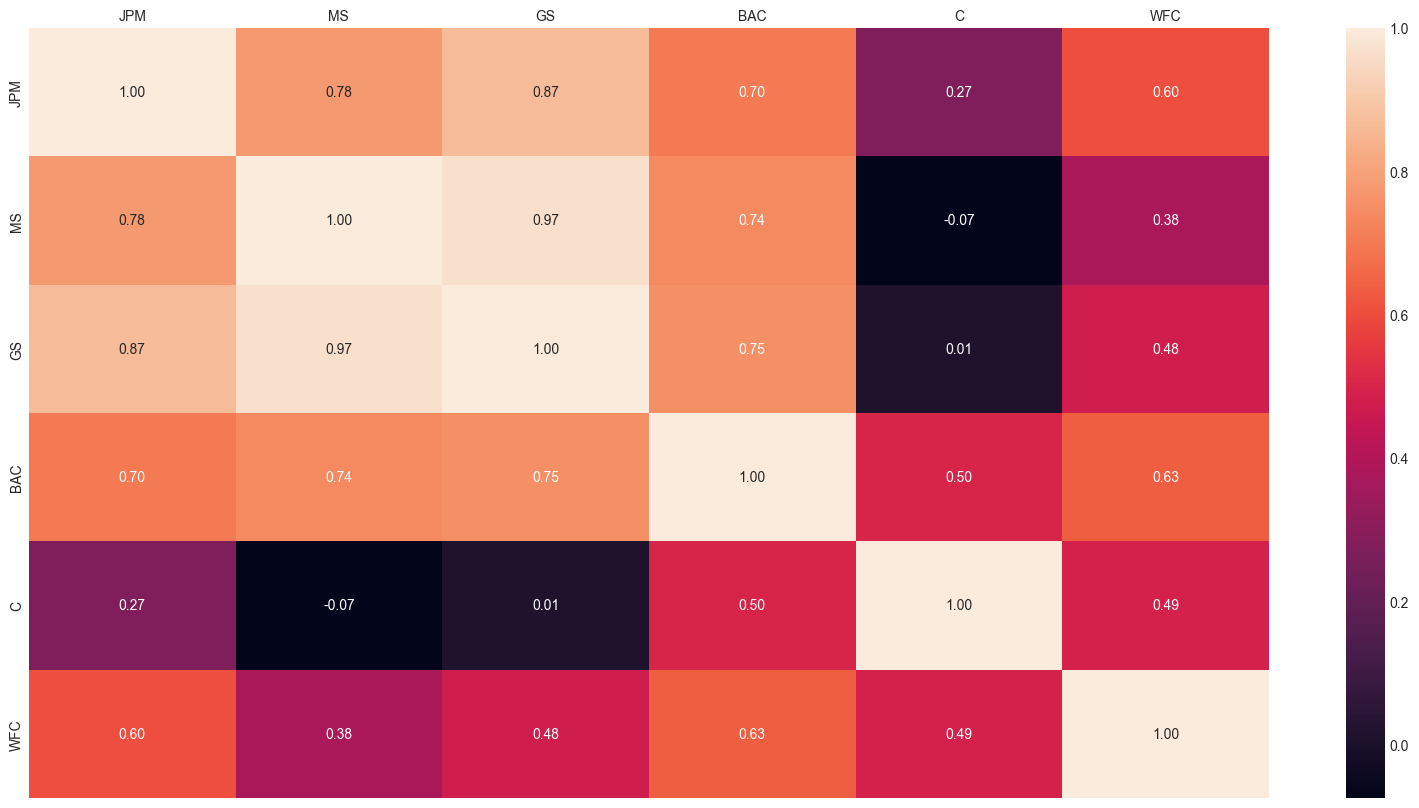

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
ht = sns.heatmap(dfClose.corr(), annot=True, fmt='.2f')
ht.set(xlabel="", ylabel="")
ht.xaxis.tick_top()

The correlation of the type "each with each" looks great but doesn't tell much. It is necessary to introduce a substitute correlation coefficient, calculated as the average correlation of 1 ticker with all others. It can be observed that the ticker "BAC" has the highest correlation with the portfolio, and it should have its weights "trimmed" in the portfolio.

In [48]:
tickerCorr = {}
for column in corrMatrix.columns:
    corrColumn = corrMatrix[column]
    corrMean = corrColumn.mean()
    tickerCorr[column] = corrMean.round(2)

sorted_tickerCorr = sorted(tickerCorr.items(), key=lambda x: x[1]) # second element!
print(tickerCorr)

{'JPM': 0.7, 'MS': 0.63, 'GS': 0.68, 'BAC': 0.72, 'C': 0.37, 'WFC': 0.6}


## Volatility
$$volatility = \sigma_{\text{minPeriods}} \times \sqrt{minPeriods}$$

is an indicator of market risk. The higher it is, the riskier it is to stay in the market.
We can clearly observe a radical jump in volatility during the 2020 pandemic.

Text(0, 0.5, 'Volatility')

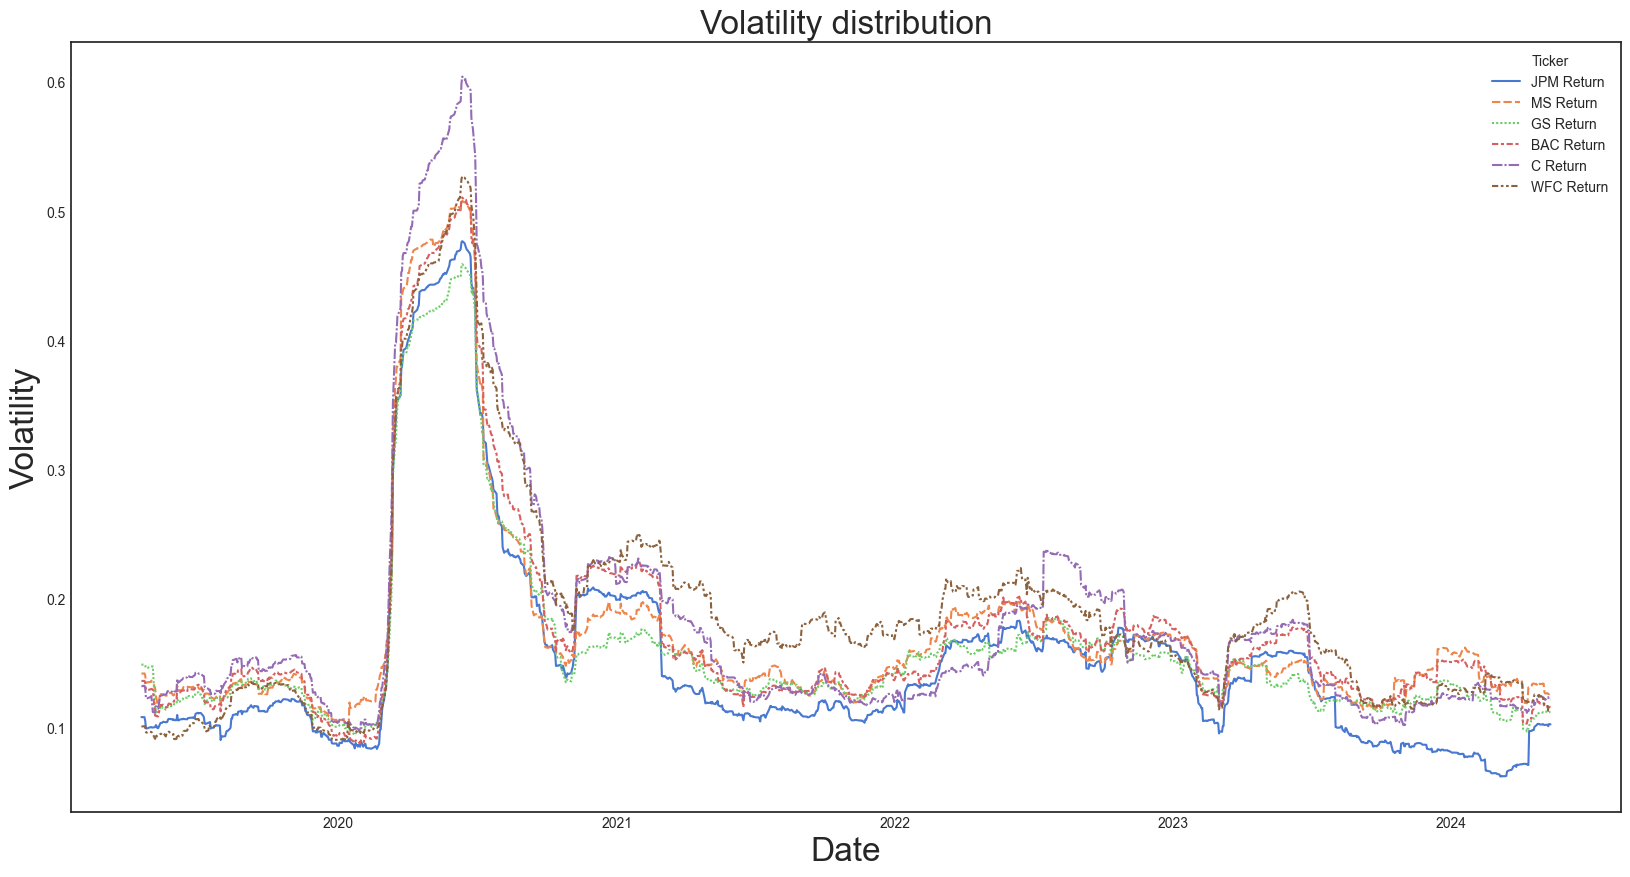

In [49]:
minPeriods = 75

vol = dfReturns.rolling(minPeriods).std() * np.sqrt(minPeriods)

f, ax = plt.subplots(figsize=(20,10))
sns.lineplot(
    vol,
    palette="muted",
)
plt.title('Volatility distribution', fontsize='24')
plt.xlabel('Date', fontsize='24')
plt.ylabel('Volatility', fontsize='24')

# Simple moving average analysis

Let's check how the theory of signals generated by two moving averages with different and arbitrarily chosen steps behaves in practice.

First, we need to establish the time steps for the moving averages - the shorter and the longer one - that is, from how many days the moving average will be calculated.

The most popular lengths in long-term trading are 50 and 200.

In [50]:
shortWindow = 50
shortWindowLabel = 'SMA{}'.format(shortWindow)
longWindow = 200
longWindowLabel = 'SMA{}'.format(longWindow)

## Buy/Sell signals - points where short SMA crosses long from bottom-up or up-bottom

In the practical application of two moving averages, we are interested in the signals generated by the crossing of the averages. When the average with the shorter step becomes larger than the longer one, we have a buy signal - the market's cumulative demand is greater than the long-term trend. The opposite situation occurs when the shorter average becomes smaller than the longer one - we receive a sell signal.

Buy = 1, Sell = -1, Hold = 0

In [51]:
dfCloseSMA = dfClose.copy()
dfCloseSMA['Date'] = dfCloseSMA.index

dfCloseSMA['JPMsignalMark'] = 0

dfCloseSMA['smaShort'] = dfCloseSMA['JPM'].rolling(window=shortWindow, min_periods=1).mean()
dfCloseSMA['smaLong'] = dfCloseSMA['JPM'].rolling(window=longWindow, min_periods=1).mean()

# NumPy.where(): if True return 1 or -1; if False return 0
# Find the periods in which the short average is greater than the long one.

dfCloseSMA['JPMsignalMark'] = np.where(dfCloseSMA['smaShort'] > dfCloseSMA['smaLong'], 1, 0)

# NumPy.diff(): the first difference is given by out[i] = a[i+1] - a[i] along the given axis
# Find a trading signal

dfCloseSMA['JPMsignalMark'] = dfCloseSMA['JPMsignalMark'].diff()


Mark Buy/Sell has been established for variable -1/1 (SMAs crossover point), but it's linked to the actual price, highlighting that this technique generates a delay not only in time but also in price.

First iteration of simple moving analysis technique.

In [52]:
plt.style.use('seaborn-v0_8-white')

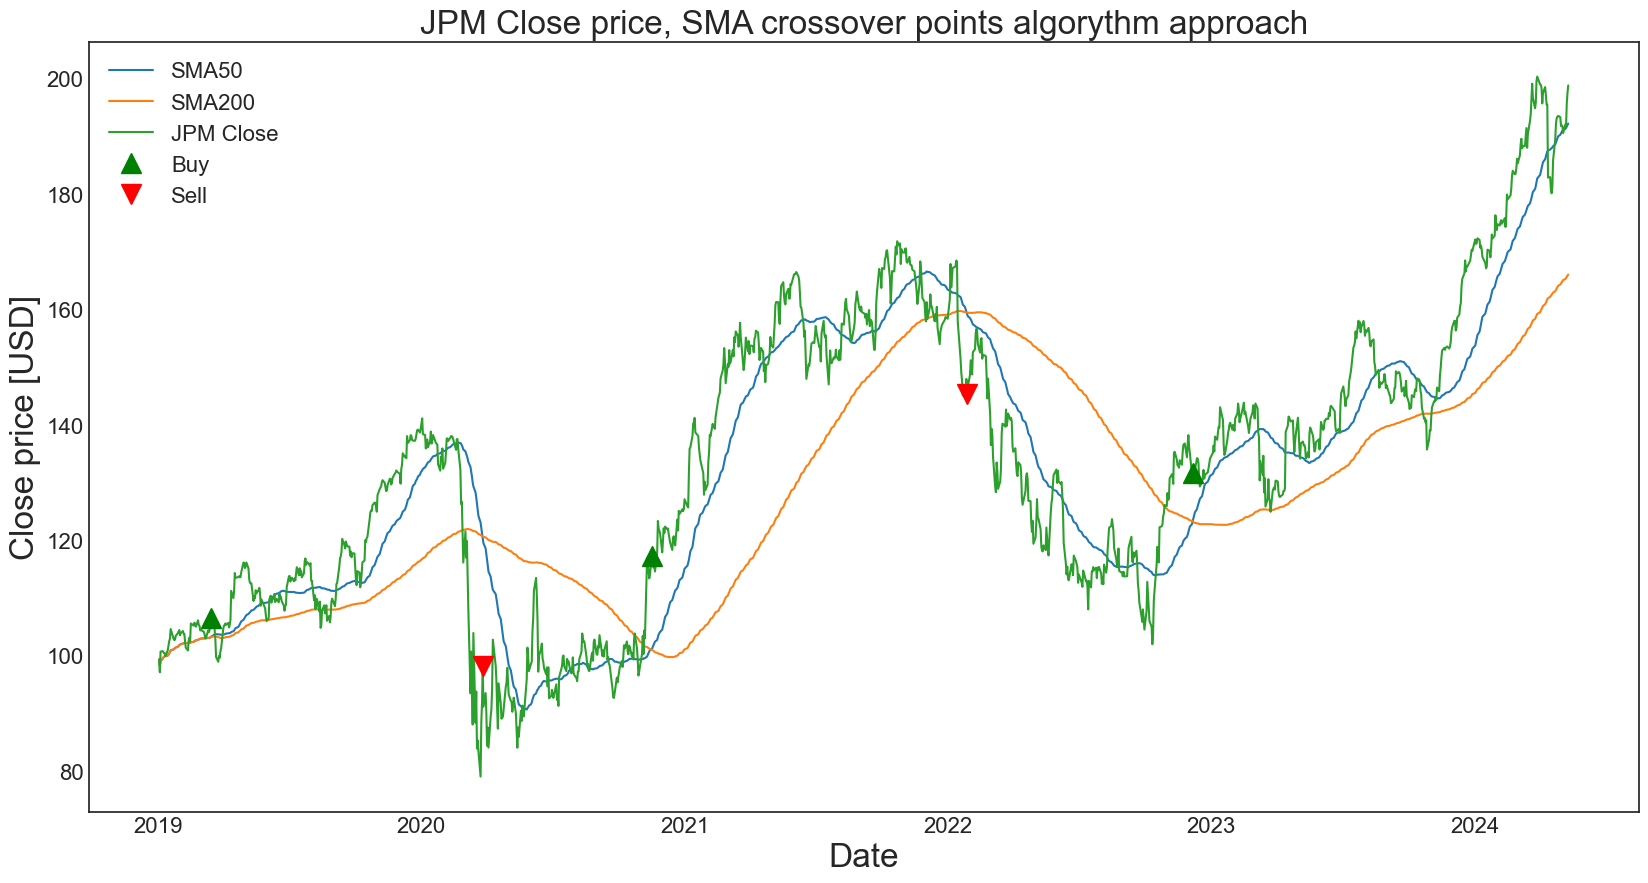

Ticker,JPM,MS,GS,BAC,C,WFC,Date,JPMsignalMark,smaShort,smaLong
Date,,,,,,,,,,
2019-03-15,106.550003,43.330002,198.259995,29.299999,65.190002,50.660000,2019-03-15,1.0,103.269200,103.191569
2020-03-26,98.120003,35.709999,165.789993,22.719999,46.020000,30.900000,2020-03-26,-1.0,120.359200,120.644200
2020-11-16,117.300003,58.110001,222.380005,27.580000,50.400002,24.900000,2020-11-16,1.0,101.206000,101.005950
2022-01-27,145.309998,101.150002,341.029999,45.470001,64.150002,53.759998,2022-01-27,-1.0,159.156801,159.419850
2022-12-06,131.589996,87.510002,362.910004,33.000000,44.980000,43.400002,2022-12-06,1.0,123.259999,123.222800


In [53]:
plt.figure(figsize=(20,10))

plt.plot(dfCloseSMA.index, dfCloseSMA['smaShort'],label=shortWindowLabel)
plt.plot(dfCloseSMA.index, dfCloseSMA['smaLong'],label=longWindowLabel)
plt.plot(dfCloseSMA.index, dfCloseSMA['JPM'],label='JPM Close')

plt.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
plt.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

plt.title('JPM Close price, SMA crossover points algorythm approach', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close price [USD]', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(loc='upper left', fontsize='16')
plt.show()

# Transactions list
(dfCloseSMA.loc[(dfCloseSMA['JPMsignalMark'] == 1) | (dfCloseSMA['JPMsignalMark'] == -1)])


## Counting total return from hypothetical investment

In [54]:
initialCapital = 10000 # USD

dfCloseSMA['DailyReturns'] = dfCloseSMA['JPM'].pct_change()
dfCloseSMA['OnMarket'] = 0
dfCloseSMA.loc[dfCloseSMA['smaShort'] > dfCloseSMA['smaLong'], 'OnMarket'] = 1

dfCloseSMA['OnMarketReturns'] = dfCloseSMA['DailyReturns'] * dfCloseSMA['OnMarket'].shift(1) # Transaction is set the day after signal
dfCloseSMA['CumulativeProfit'] = (1 + dfCloseSMA['OnMarketReturns']).cumprod() * initialCapital
dfCloseSMA['StrategyCumulative'] = (1 + dfCloseSMA['OnMarketReturns']).cumprod() * dfCloseSMA['JPM'].iloc[0]

dfCloseSMA.bfill(inplace=True)


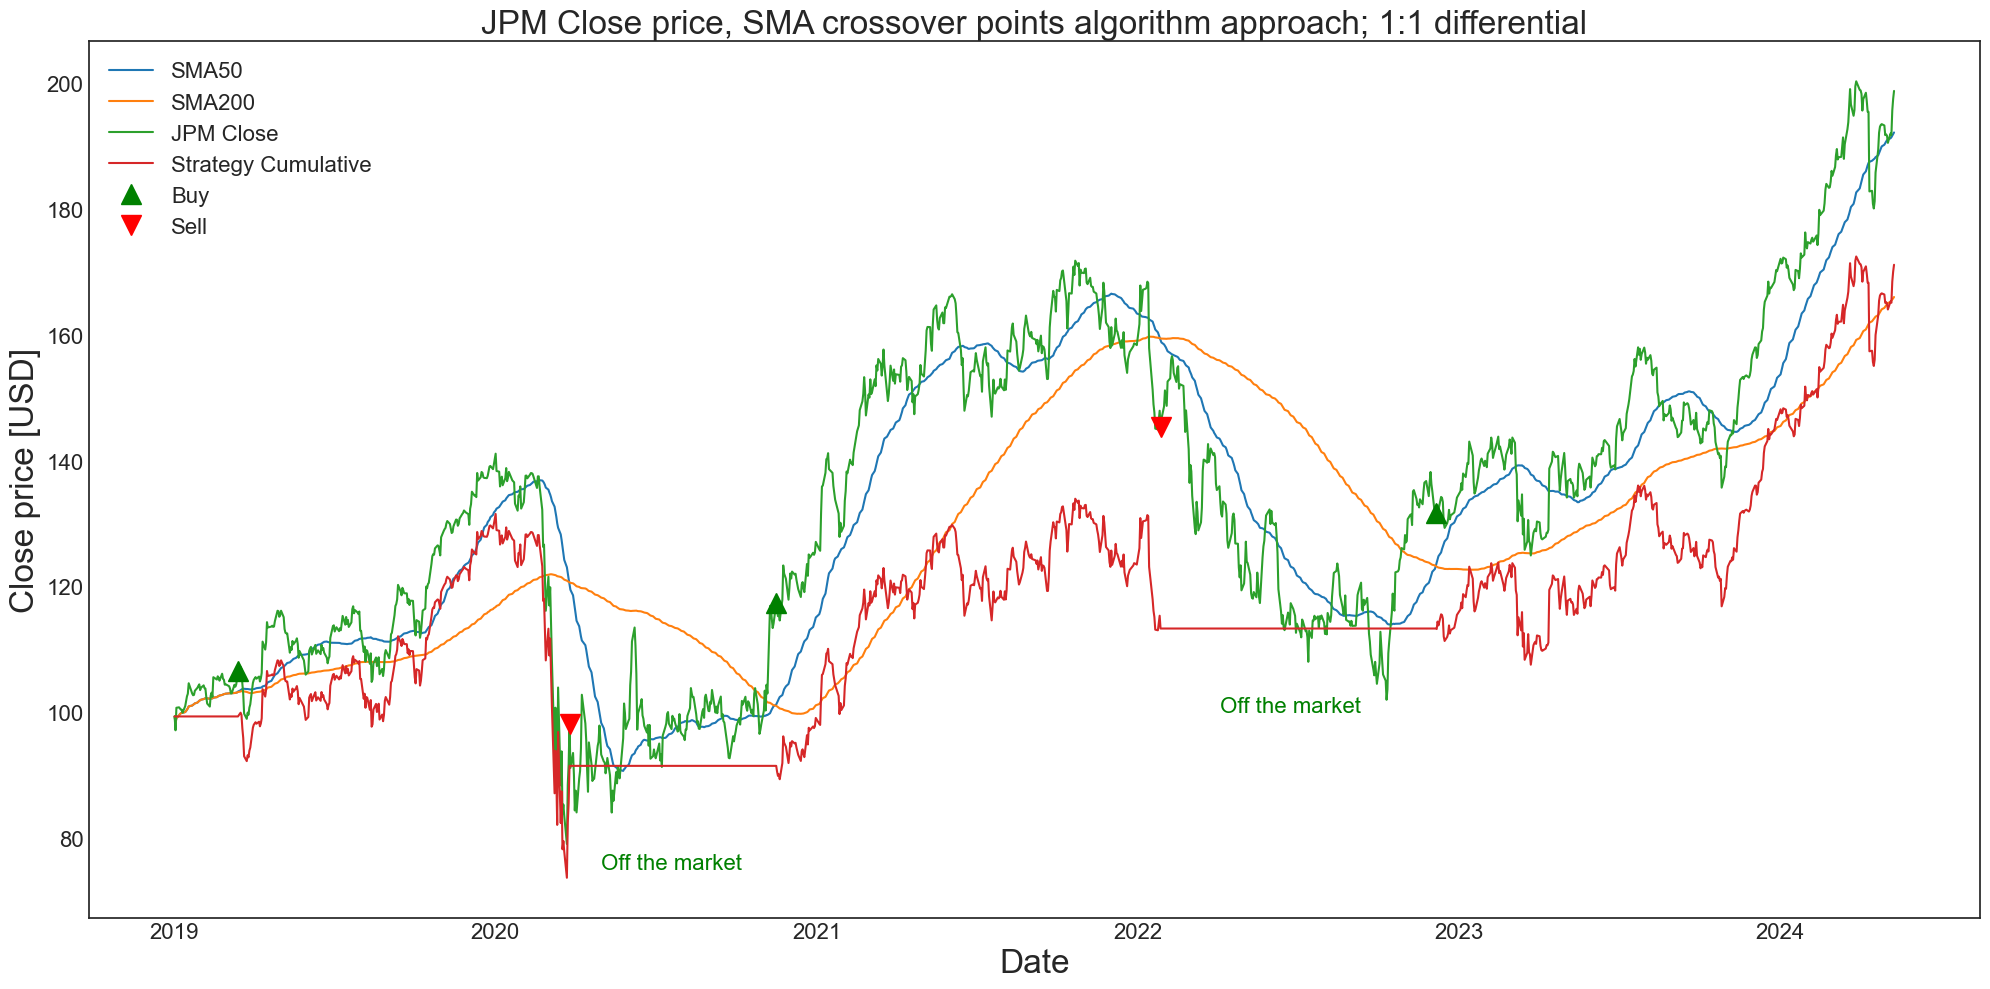

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.gca()

ax1.plot(dfCloseSMA.index, dfCloseSMA['smaShort'], label=shortWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['smaLong'], label=longWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['JPM'], label='JPM Close')
ax1.plot(dfCloseSMA.index, dfCloseSMA['StrategyCumulative'], label='Strategy Cumulative')

ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

ax1.set_xlabel('Date', fontsize=24)
ax1.set_ylabel('Close price [USD]', fontsize=24)
ax1.tick_params(labelsize=16)
ax1.legend(loc='upper left', fontsize='16')

ax1.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2020-05-01'], 75), 
    xytext=(dfCloseSMA['Date'].loc['2020-05-01'], 75),
    fontsize=16, color='green'
)
ax1.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2022-04-05'], 100), 
    xytext=(dfCloseSMA['Date'].loc['2022-04-05'], 100),
    fontsize=16, color='green'
)
plt.title('JPM Close price, SMA crossover points algorithm approach; 1:1 differential', fontsize=24)
plt.tight_layout()
plt.show()

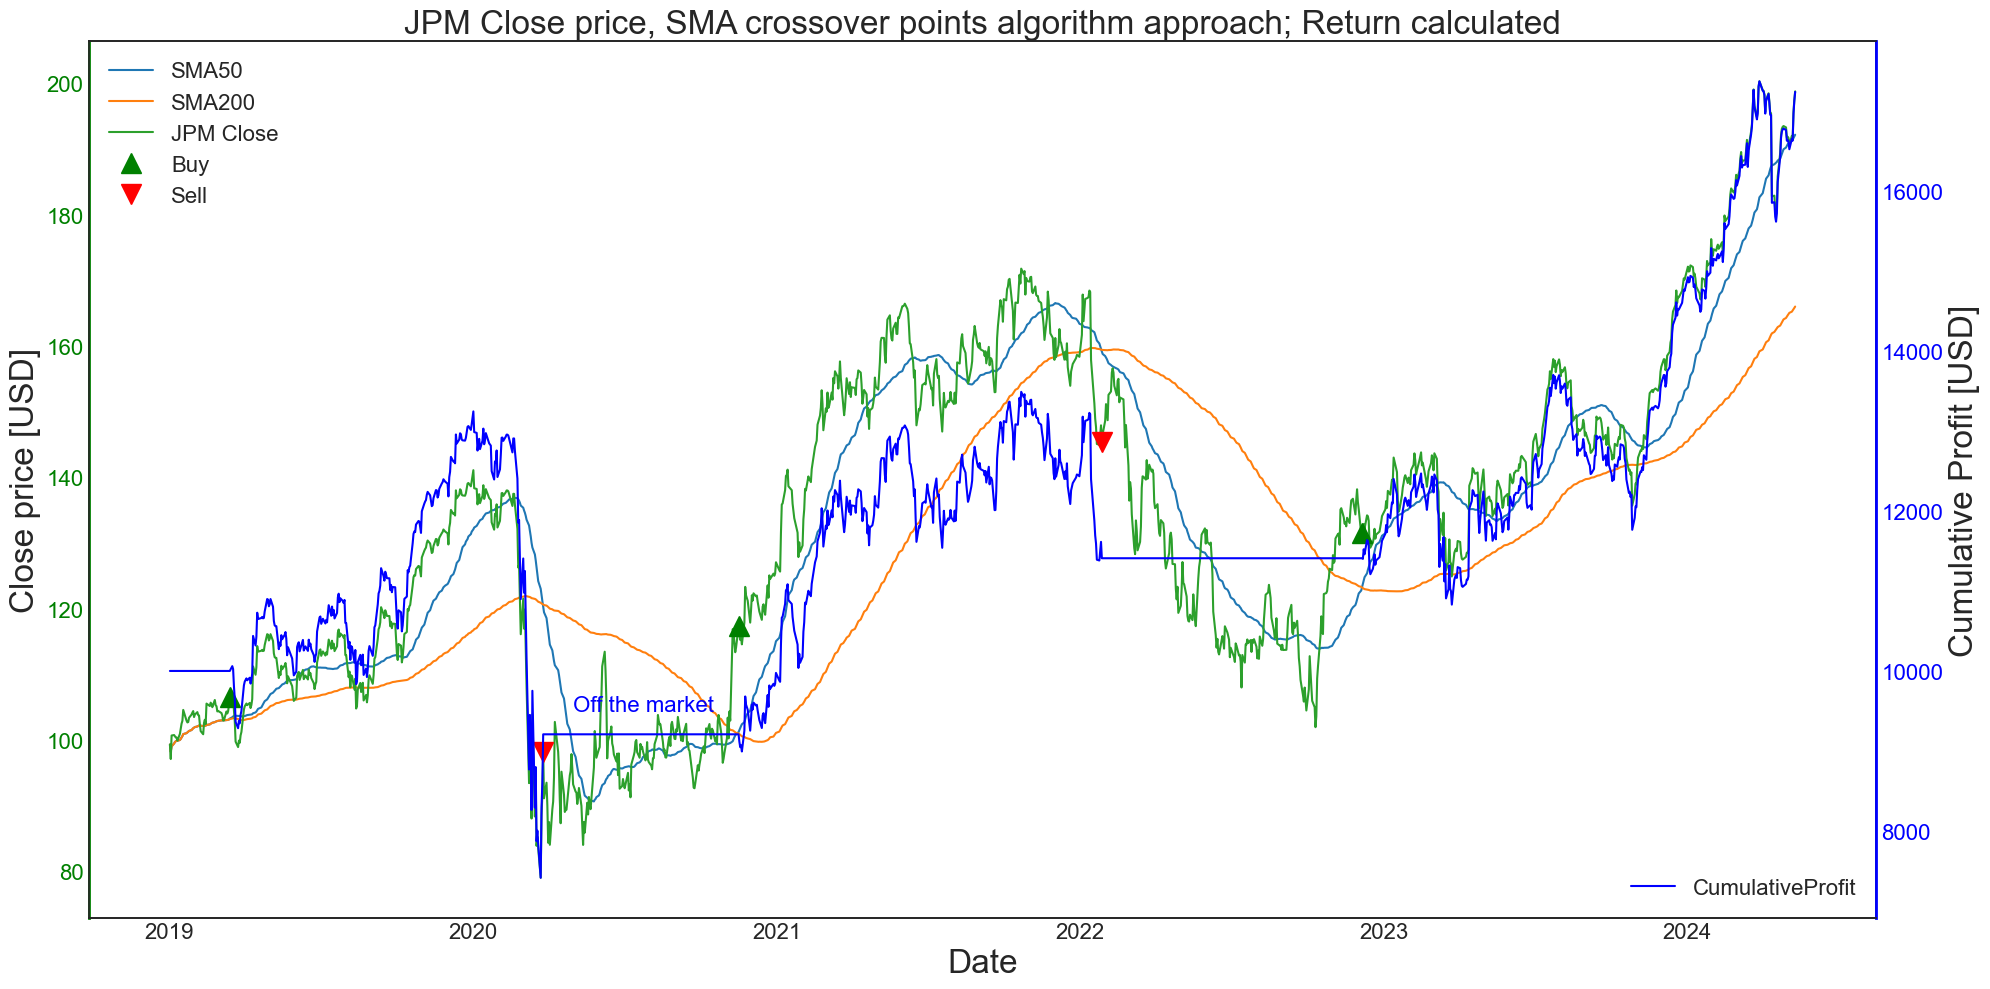

- Strategy pct. return 172.32% vs Buy and hold pct. return 200.15%

- Initial capital was 10000 USD, and cumulative profit amounted to     7231.76 USD; 
which gives a total amount equal         to 17231.76 USD


In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.gca()

ax1.plot(dfCloseSMA.index, dfCloseSMA['smaShort'], label=shortWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['smaLong'], label=longWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['JPM'], label='JPM Close')

ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

ax1.set_xlabel('Date', fontsize=24)
ax1.set_ylabel('Close price [USD]', fontsize=24)
ax1.tick_params(labelsize=16)
ax1.legend(loc='upper left', fontsize='16')
ax1.spines['left'].set_color('green')
ax1.spines['left'].set_linewidth(2)
ax1.tick_params(axis='y', colors='green', width=2)

ax2 = ax1.twinx()
ax2.plot(dfCloseSMA.index, dfCloseSMA['CumulativeProfit'], label='CumulativeProfit', color='blue')
ax2.set_ylabel('Cumulative Profit [USD]', fontsize=24)
ax2.legend(loc='lower right', fontsize='16')
ax2.spines['right'].set_color('blue')
ax2.spines['right'].set_linewidth(2)
ax2.tick_params(axis='y', colors='blue', width=2)
ax2.tick_params(labelsize=16)

ax2.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2020-05-01'], 9500), 
    xytext=(dfCloseSMA['Date'].loc['2020-05-01'], 9500),
    fontsize=16, color='blue'
)

plt.title('JPM Close price, SMA crossover points algorithm approach; Return calculated', fontsize=24)
plt.tight_layout()
plt.show()

buy_and_hold_pct = (dfCloseSMA['JPM'].iloc[-1] / dfCloseSMA['JPM'].iloc[0]) * 100
strategy_pct = (dfCloseSMA['StrategyCumulative'].iloc[-1] / dfCloseSMA['JPM'].iloc[0]) * 100

print(f"- Strategy pct. return {round(strategy_pct, 2)}% vs Buy and hold pct. return {round(buy_and_hold_pct, 2)}%")
print()
print(f"- Initial capital was {initialCapital} USD, and cumulative profit amounted to \
    {round(dfCloseSMA['CumulativeProfit'].iloc[-1] - initialCapital, 2)} USD; \nwhich gives a total amount equal \
        to {round(dfCloseSMA['CumulativeProfit'].iloc[-1], 2)} USD")

# Expotential moving average

The Exponential Moving Average (EMA) is a type of weighted moving average (WMA) that places a greater weight and significance on the most recent data points. It is commonly used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles.

**Application**

EMA is particularly popular in stock market analysis, where it helps traders and analysts track the momentum and potentially identify trends in stock prices. It's also used in economics for forecasting future trends based on historical data.

**Formula**

The formula for the Exponential Moving Average is given by:

$$
EMA_{today} = (\text{Value}_{today} \times K) + (EMA_{yesterday} \times (1 - K))
$$

where:
- $\text{Value}_{today}$ is the price or value at the current time period.
- $EMA_{yesterday}$ is the EMA from the previous period.
- $K$ is the smoothing constant, calculated as $\frac{2}{{N + 1}}$, where $N$ is the number of periods in the EMA.

This formula helps in reducing the lag by applying more weight to recent data, making the EMA quicker to react to price changes compared to the Simple Moving Average (SMA).


In [57]:
dfCloseEMA = dfClose.copy()

In [58]:
dfCloseEMA['JPMsignalMark'] = 0
dfCloseEMA['emaLong'] = dfClose['JPM'].ewm(span=200, adjust=False).mean()

dfCloseEMA['JPMsignalMark'] = np.where(dfCloseEMA['emaLong'] < dfCloseEMA['JPM'], 1, 0)
dfCloseEMA['JPMsignalMark'] = dfCloseEMA['JPMsignalMark'].diff()

initialCapital = 10000 # USD

dfCloseEMA['DailyReturns'] = dfCloseEMA['JPM'].pct_change()
dfCloseEMA['OnMarket'] = 0
dfCloseEMA.loc[dfCloseEMA['emaLong'] < dfCloseEMA['JPM'], 'OnMarket'] = 1

dfCloseEMA['OnMarketReturns'] = dfCloseEMA['DailyReturns'] * dfCloseEMA['OnMarket'].shift(1) # Transaction is set the day after signal
dfCloseEMA['CumulativeProfit'] = (1 + dfCloseEMA['OnMarketReturns']).cumprod() * initialCapital
dfCloseEMA['StrategyCumulative'] = (1 + dfCloseEMA['OnMarketReturns']).cumprod() * dfCloseEMA['JPM'].iloc[0]

dfCloseEMA.bfill(inplace=True)

# Transactions list
(dfCloseEMA.loc[(dfCloseEMA['JPMsignalMark'] == 1) | (dfCloseEMA['JPMsignalMark'] == -1)]).head()

Ticker,JPM,MS,GS,BAC,C,WFC,JPMsignalMark,emaLong,DailyReturns,OnMarket,OnMarketReturns,CumulativeProfit,StrategyCumulative
Date,,,,,,,,,,,,,
2019-01-04,100.690002,41.299999,175.050003,25.580000,55.130001,47.950001,1.0,99.302056,0.036865,1,0.000000,10000.000000,99.309998
2019-03-22,99.760002,41.720001,188.960007,27.010000,60.980000,48.310001,-1.0,101.098736,-0.030232,0,-0.030232,9907.637275,98.392743
2019-03-29,101.230003,42.200001,191.990005,27.590000,62.220001,48.320000,1.0,101.049284,0.005163,1,0.000000,9907.637275,98.392743
2019-08-14,104.800003,39.330002,195.559998,26.420000,61.410000,43.970001,-1.0,107.395342,-0.041522,0,-0.041522,10257.042203,101.862684
2019-08-16,107.720001,39.939999,199.419998,27.030001,63.480000,44.389999,1.0,107.376945,0.023954,1,0.000000,10257.042203,101.862684


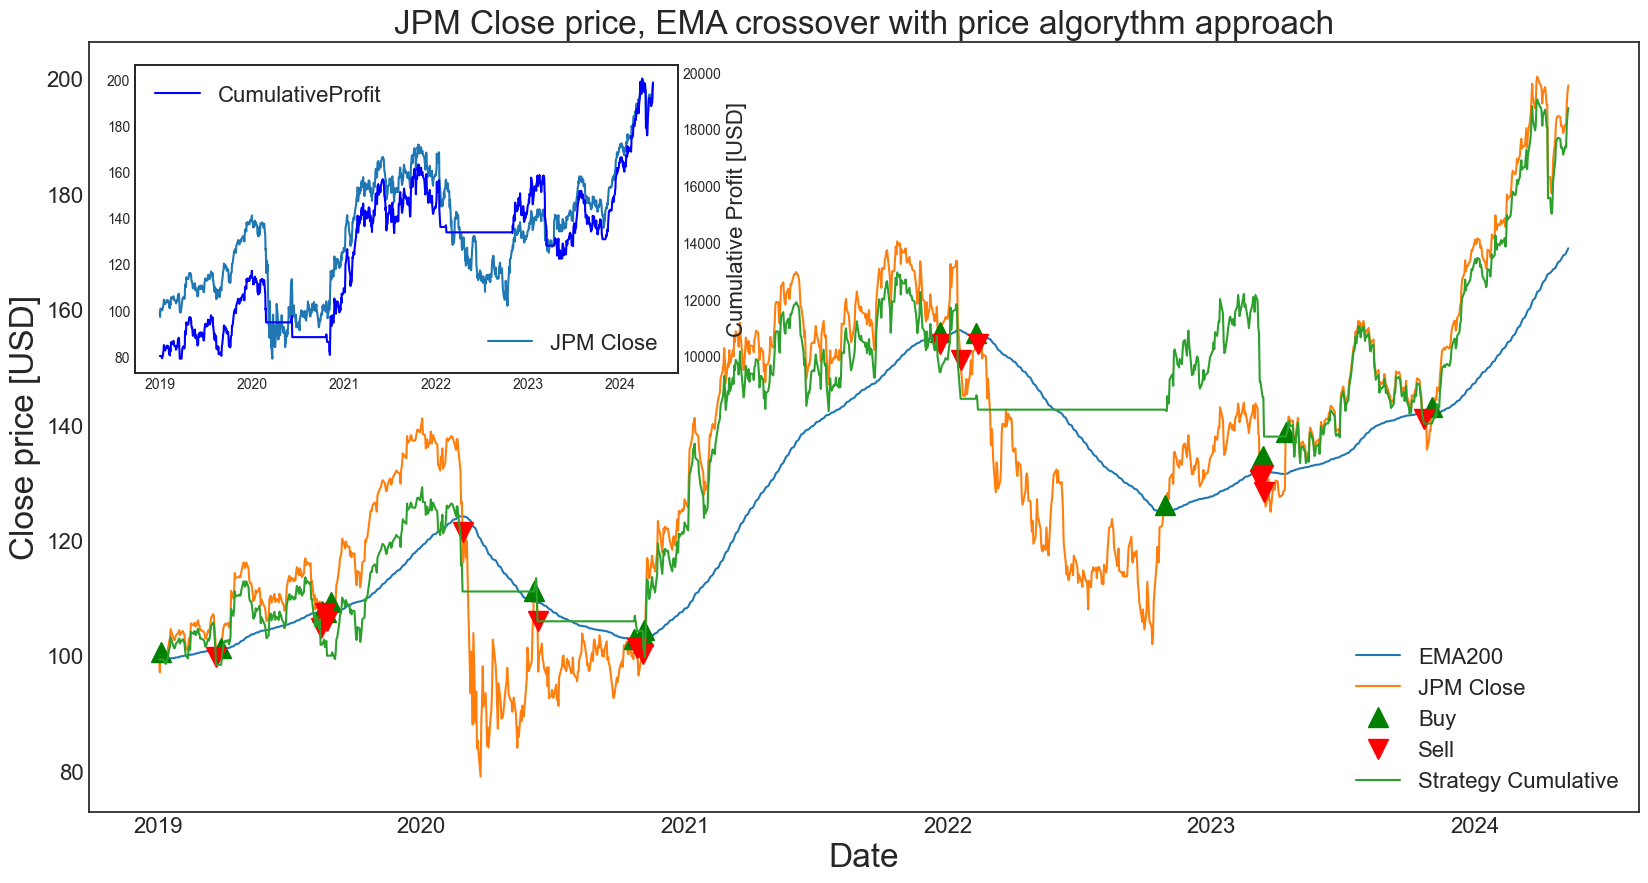

- EMA strategy pct. return 196.22% vs Buy and hold pct. return 200.15%

- Initial capital was 10000 USD, and cumulative profit amounted to     9621.69 USD; 
which gives a total amount equal         to 19621.69 USD


In [59]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(dfCloseEMA.index, dfCloseEMA['emaLong'],label='EMA200')
ax.plot(dfCloseEMA.index, dfCloseEMA['JPM'],label='JPM Close')
ax.plot(dfCloseEMA.loc[dfCloseEMA['JPMsignalMark'] == 1].index, dfCloseEMA['JPM'].loc[dfCloseEMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax.plot(dfCloseEMA.loc[dfCloseEMA['JPMsignalMark'] == -1].index, dfCloseEMA['JPM'].loc[dfCloseEMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)
ax.plot(dfCloseEMA.index, dfCloseEMA['StrategyCumulative'], label='Strategy Cumulative')

plt.title('JPM Close price, EMA crossover with price algorythm approach', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close price [USD]', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(loc='lower right', fontsize='16')

inset_ax = ax.inset_axes([0.030, 0.570, 0.350, 0.400])
inset_ax.plot(dfCloseEMA.index, dfCloseEMA['JPM'],label='JPM Close')
inset_ax2 = inset_ax.twinx()
inset_ax2.plot(dfCloseEMA.index, dfCloseEMA['CumulativeProfit'], label='CumulativeProfit', color='blue')
inset_ax2.set_ylabel('Cumulative Profit [USD]', fontsize=16)
inset_ax.legend(loc='lower right', fontsize='16')
inset_ax2.legend(loc='upper left', fontsize='16')

plt.show()

buy_and_hold_pct = (dfCloseEMA['JPM'].iloc[-1] / dfCloseEMA['JPM'].iloc[0]) * 100
strategy_pct = (dfCloseEMA['StrategyCumulative'].iloc[-1] / dfCloseEMA['JPM'].iloc[0]) * 100

print(f"- EMA strategy pct. return {round(strategy_pct, 2)}% vs Buy and hold pct. return {round(buy_and_hold_pct, 2)}%")
print()
print(f"- Initial capital was {initialCapital} USD, and cumulative profit amounted to \
    {round(dfCloseEMA['CumulativeProfit'].iloc[-1] - initialCapital, 2)} USD; \nwhich gives a total amount equal \
        to {round(dfCloseEMA['CumulativeProfit'].iloc[-1], 2)} USD")

# Expotential MA vs Simple MA

As we can observe, there is a significant difference between the SMA (Simple Moving Average) and EMA (Exponential Moving Average) approaches. In this specific case, EMA performs better because it weights current data more heavily, and we used only one average intersecting with the stock price chart. This results in significantly more frequent transactions. However, the number of transactions over the years covered in the analysis does not outweigh the result, as transaction costs are currently exceptionally low. Nonetheless, the frequency of transactions can be mentally exhausting for some traders, especially beginners. Using two SMAs, on the other hand, appears to be very conservative. However, it is important to note that this has its cost, namely a delayed signal generates larger "losses" in percentage terms during downturns. There are also noticeably fewer signals, which can be motivating. The choice of approach is highly subjective. It must be noted that the approach presented is actually the final stage of selecting and trading these stocks, because the use of short-term signal strategies makes sense only when dealing with strong upward momentum, which only occurs with good companies and a suitable market environment.